# Imports

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from math import exp,sqrt



# Problem 1
Consider the following first-order differential equation
\begin{align}
2x\frac{dx}{dt} +  t^2(1+x^2)=0 ,\quad \text{with} \quad x(0)=1. \qquad (1)
\end{align}

We are interested in computing the solution for $x(t)$ numerically. Specifically, we would like to estimate the solution at $t=1$, i.e., $x(1)$.


(a) Solve the differential equation in (1) analytically, and determine the interval of existence of the solution.

(b) Using the Euler method with step size $\Delta t=0.1,\, 0.01,\, 0.001,\, 0.0001, \text{ and } 0.00001$, estimate $x(t)$ numerically -- call the result $\hat x(t)$. Show your results on the same graph using the  `plt.plot` command in Python, after you have imported `Matplotlib.pyplot` as `plt` by writing `import Matplotlib.pyplot as plt`. Use different colors, or dashed/dotted/ solid lines, and use the  `plt.legend` command to indicate which graph corresponds to which $\Delta t$. For more info on the `plt.legend` and `plt.plot` commands, check out the python documentation.
 
(c) Plot the error $E=|\hat x(1)-x(1)|$ as a function of $\Delta t$. Then plot $\ln (E)$ vs. $\ln (\Delta t)$. Explain your results.


(d) Repeat (b) and (c) using the improved Euler method.


### solution (a)

 To solve this ODE analytically, we first separate variables. \
\
$2x\frac{dx}{dt}=-t^2(1+x^2)$
\
\
$\int{\frac{2x}{1+x^2}dx}=\int{-t^2dt}$
\
\
$\ln(1+x^2)=-\frac{t^3}{3}+c$
\
\
Since we have the initial condition x(0)=1,\
$\ln(1+1)=c$\
$c=\ln(2)$\
\
Substituting c back into the equation, we get:\
$\ln(1+x^2)=-\frac{t^3}{3}+\ln(2)$\
\
Consider both sides as exponent of e, we get: 
\
$1+x^2=e^{\ln2-\frac{t^3}{3}}$\
\
$1+x^2=2*e^{-\frac{t^3}{3}}$\
\
$x=\pm\sqrt{2*e^{-\frac{t^3}{3}}-1}$\
\
Since we have the initial condition  x(0)=1,\
we only pick the upper half of the curve, namely, $x=\sqrt{2*e^{-\frac{t^3}{3}}-1}$\
\
In order for the solution to exist, \
the components under square root must be nonnegative,\
$2*e^{-\frac{t^3}{3}}-1\geqslant 0$\
\
$e^{-\frac{t^3}{3}}\geqslant \frac{1}{2}$\
\
Taking natural log of both sides, \
$-\frac{t^3}{3}\geqslant\ln(\frac{1}{2})$\
\
Solving this, we get:\
$t\leqslant \sqrt[3]{3\ln(2)}$

### solution (b)

Note:\
ODE transfromed:$$\frac{dx}{dt}=-\frac{t^2(1+x^2)}{2x}=f(x),   x(0)=1 $$
\
Exact solution:$$x=\sqrt{2*e^{-\frac{t^3}{3}}-1}$$

In [2]:
#define a function to calculate f(t,x)
def f(t,x):
    return -t**2*(1+x**2)/(2*x)

#define a function to calculate exact x
def x_exact(t):
    return sqrt(2*exp(-t**3/3)-1)
    
#define the forward euler method
def Forward_Euler(x0,N,T):
    dt=T/N
    t=np.arange(N)*dt
    x=np.zeros(N)
    x[0]=x0
    for i in range(N-1):
        x[i+1]=x[i]+dt*f(t[i],x[i])
    return t,x

#define the improved euler method
def Improved_Euler(x0,N,T):
    dt=T/N
    t=np.arange(N)*dt
    x=np.zeros(N)
    
    x[0]=x0
    for i in range(N-1):
        x[i+1]=x[i]+dt/2*(f(t[i],x[i])+f(t[i]+dt,x[i]+dt*f(t[i],x[i])))
    return t,x

Forward Euler's Method
-------

Text(0.5, 1.0, 'x(t) as dt varies from 0.1, 0.01, 0.001, 0.0001, 0.00001')

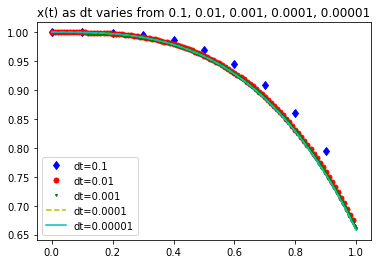

In [3]:
T=1
x0=1
N1=10
x_10,y_10=Forward_Euler(x0,N1,T)
plt.plot(x_10,y_10,'db',markersize=6,label="dt=0.1")

N2=100
x_100,y_100=Forward_Euler(x0,N2,T)
plt.plot(x_100,y_100,'or',markersize=5,label="dt=0.01")

N3=1000
x_1000,y_1000=Forward_Euler(x0,N3,T)
plt.plot(x_1000,y_1000,'vg',markersize=2,label="dt=0.001")

N4=10000
x_10000,y_10000=Forward_Euler(x0,N4,T)
plt.plot(x_10000,y_10000,'--y',markersize=3,label="dt=0.0001")

N5=100000
x_100000,y_100000=Forward_Euler(x0,N5,T)
plt.plot(x_100000,y_100000,'-c',markersize=5,label="dt=0.00001")


plt.legend(loc='best')
plt.title('x(t) as dt varies from 0.1, 0.01, 0.001, 0.0001, 0.00001')

### solution (c)

**(1)Plot E as a function of delta t**

Text(0.5, 1.0, 'Error with Respect to Delta t')

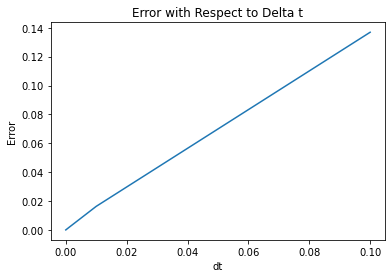

In [4]:
deltat=np.zeros(5)
for i in range(5):
    deltat[i]=10**(-i-1)
    
    
#calculate x(1)
x1=x_exact(1)
E=[y_10[-1],y_100[-1],y_1000[-1],y_10000[-1],y_100000[-1]]
for j in range(5):
    E[j]=abs(E[j]-x1)

plt.plot(deltat,E)
plt.xlabel("dt")
plt.ylabel("Error")
plt.title("Error with Respect to Delta t")

Explanation: 

The error is proportional to the step size. This is because our Forward Euler Method is a first-order method,\
where E~c*dt, meaning if we divide the step size dt by 10, the error will correspondingly be divided by 10.

**(2) Plot ln(E) vs ln(delta t)**

Text(0.5, 1.0, 'ln(E) with Respect ln(delta t)')

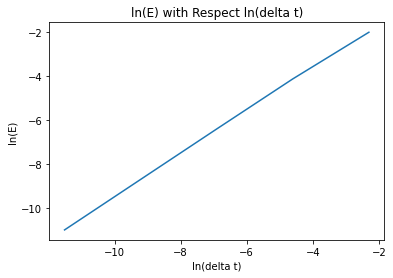

In [5]:
lndeltat=np.log(deltat)
lnE=np.log(E)
plt.plot(lndeltat,lnE)
plt.xlabel("ln(delta t)")
plt.ylabel("ln(E)")
plt.title("ln(E) with Respect ln(delta t)")

### solution (d)

Improved Euler's Method
----------

Text(0.5, 1.0, 'Improved Euler Method:x(t) as dt varies from 0.1, 0.01, 0.001, 0.0001, 0.00001')

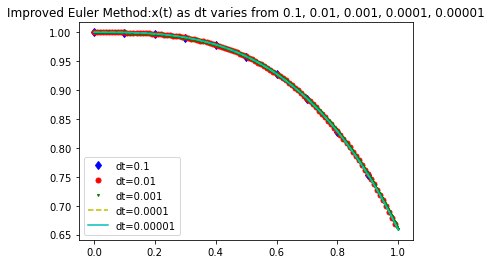

In [6]:
T=1
x0=1
N1=10
xi_10,yi_10=Improved_Euler(x0,N1,T)
plt.plot(xi_10,yi_10,'db',markersize=6,label="dt=0.1")

N2=100
xi_100,yi_100=Improved_Euler(x0,N2,T)
plt.plot(xi_100,yi_100,'or',markersize=5,label="dt=0.01")

N3=1000
xi_1000,yi_1000=Improved_Euler(x0,N3,T)
plt.plot(xi_1000,yi_1000,'vg',markersize=2,label="dt=0.001")

N4=10000
xi_10000,yi_10000=Improved_Euler(x0,N4,T)
plt.plot(xi_10000,yi_10000,'--y',markersize=3,label="dt=0.0001")

N5=100000
xi_100000,yi_100000=Improved_Euler(x0,N5,T)
plt.plot(xi_100000,yi_100000,'-c',markersize=5,label="dt=0.00001")


plt.legend(loc='best')
plt.title('Improved Euler Method:x(t) as dt varies from 0.1, 0.01, 0.001, 0.0001, 0.00001')

Text(0.5, 1.0, 'Improved Euler Method: Error with Respect to Delta t')

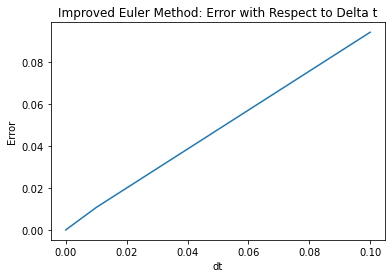

In [8]:
deltat=np.zeros(5)
for i in range(5):
    deltat[i]=10**(-i-1)
#calculate x(1)
x1=x_exact(1)
Ei=[yi_10[-1],yi_100[-1],yi_1000[-1],yi_10000[-1],yi_100000[-1]]

for j in range(5):
    Ei[j]=abs(Ei[j]-x1)

plt.plot(deltat,Ei)
plt.xlabel("dt")
plt.ylabel("Error")
plt.title("Improved Euler Method: Error with Respect to Delta t")


Text(0.5, 1.0, "Improved Euler's Method: ln(E) with Respect ln(delta t)")

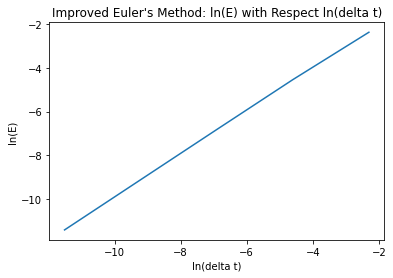

In [9]:
lndeltat=np.log(deltat)
lnEi=np.log(Ei)
plt.plot(lndeltat,lnEi)
plt.xlabel("ln(delta t)")
plt.ylabel("ln(E)")
plt.title("Improved Euler's Method: ln(E) with Respect ln(delta t)")

# Problem 2

Consider the initial-value problem 
\begin{align}
\frac{dx}{dt} = x+e^{-x},\quad \text{with} \quad x(0)=0. \qquad (2)
\end{align}

This problem cannot be solved analytically, therefore, we will use numerical schemes to find $\hat x(t)$, the numerical estimate for $x(t)$.


(a) Using the Euler method, determine an approximate solution for (2) at $t=2$ to four decimal places accuracy. Hint: Start with $\Delta t=0.1$, then keep halving $\Delta t$ until you obtain the desired results.


(b) Repeat (a) using the improved Euler method.

(c) Repeat (a) using the Runge-Kutta method.

(d) Show a graph of $\hat x(t)$ vs. $t$ ( for $\Delta t =0.05$) that compares the three numerical schemes.  

### solution (a)

In [11]:
#define a function to calculate f2(x)
def f2(t,x):
    return x+exp(-x)

#define the forward euler method for x2
def Forward_Euler2(x0,N,T):
    dt=T/N
    t=np.arange(N)*dt
    x=np.zeros(N)
    x[0]=x0
    for i in range(N-1):
        x[i+1]=x[i]+dt*f2(t[i],x[i])
    return t,x

#define the improved euler method for x2
def Improved_Euler2(x0,N,T):
    dt=T/N
    t=np.arange(N)*dt
    x=np.zeros(N)
    
    x[0]=x0
    for i in range(N-1):
        x[i+1]=x[i]+dt/2*(f2(t[i],x[i])+f2(t[i]+dt,x[i]+dt*f2(t[i],x[i])))
    return t,x

#define the runge-kutta method for x2
def RK4_2(x0,N,T):
    dt=T/N
    t=np.arange(N)*dt
    x=np.zeros(N)
    x[0]=x0
   
    for i in range(N-1):
        k1=f2(t[i],x[i])
        k2=f2(t[i]+dt/2,x[i]+dt/2*k1)
        k3=f2(t[i]+dt/2,x[i]+dt/2*k2)
        k4=f2(t[i]+dt,x[i]+dt*k3)
        x[i+1]=x[i]+dt/6*(k1+2*k2+2*k3+k4)
    return t,x



**Forward Euler**
---------

2.931649663461059


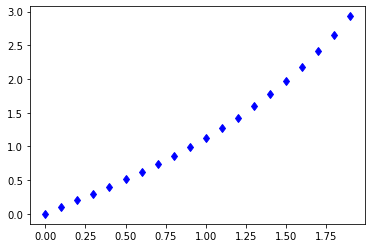

In [12]:
x0=0

#dt=0.1
T=2
N1=20
x,y1=Forward_Euler2(x0,N1,T)
plt.plot(x,y1,'db',markersize=6,label="dt=0.1")
print(y1[-1])

3.1622528917578587


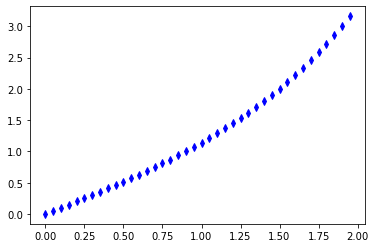

In [13]:
#dt=0.1/2
x0=0
T=2
N1=40
x,y2_FE=Forward_Euler2(x0,N1,T)
plt.plot(x,y2_FE,'db',markersize=5,label="dt=0.1")
print(y2_FE[-1])

3.288992615590928


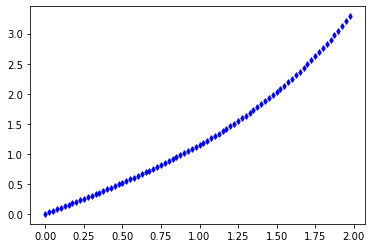

In [14]:
#dt=0.1/(2^2)
x0=0
T=2
N2=80
x,y3=Forward_Euler2(x0,N2,T)
plt.plot(x,y3,'db',markersize=4,label="dt=0.1")
print(y3[-1])

3.3555567222880267


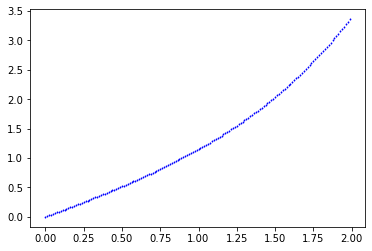

In [15]:
#dt=0.1/(2^3)
x0=0
T=2
N3=160
x,y4=Forward_Euler2(x0,N3,T)
plt.plot(x,y4,'db',markersize=1,label="dt=0.1")
print(y4[-1])

3.3555567222880267


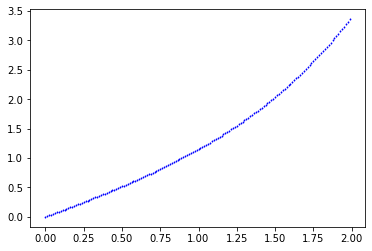

In [16]:
#dt=0.1/(2^4)
x0=0
T=2
N4=160
x,y5=Forward_Euler2(x0,N4,T)
plt.plot(x,y5,'db',markersize=1,label="dt=0.1")
print(y5[-1])

3.3555567222880267


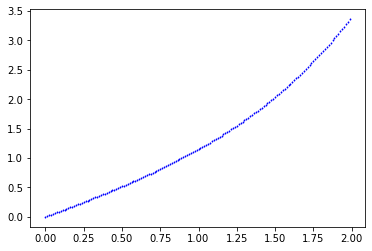

In [17]:
#dt=0.1/(2^5)
x0=0
T=2
N5=160
x,y6=Forward_Euler2(x0,N5,T)
plt.plot(x,y6,'db',markersize=1,label="dt=0.1")
print(y6[-1])

As we can see from the first 6 trials, the approximated value of x(t) stabilizes around 3.3555. The first result that reach 4 decimal places accuracy is therefore $\Delta{t}=\frac{0.1}{2^3}$, the approximated result for $x(2)\approx3.3555$

### solution (b)


**Improved Euler**
------

3.0930556529120707


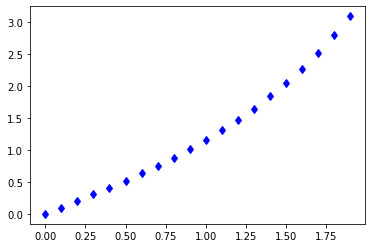

In [18]:
x0=0

#dt=0.1
T=2
N1=20
x,y1=Improved_Euler2(x0,N1,T)
plt.plot(x,y1,'db',markersize=6,label="dt=0.1")
print(y1[-1])

3.255117918317884


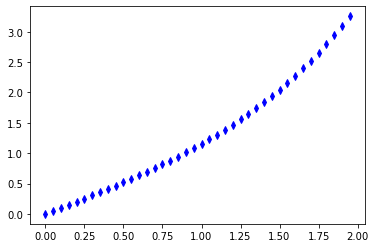

In [19]:
#dt=0.1/2
x0=0
T=2
N1=40
x,y2_IE=Improved_Euler2(x0,N1,T)
plt.plot(x,y2_IE,'db',markersize=5,label="dt=0.1")
print(y2_IE[-1])

3.3388597586757576


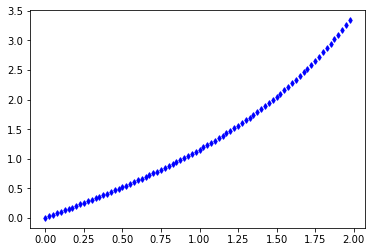

In [20]:
#dt=0.1/(2^2)
x0=0
T=2
N2=80
x,y3=Improved_Euler2(x0,N2,T)
plt.plot(x,y3,'db',markersize=4,label="dt=0.1")
print(y3[-1])

3.3814039216789356


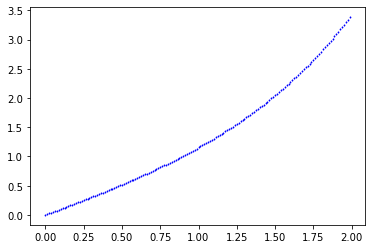

In [21]:
#dt=0.1/(2^3)
x0=0
T=2
N3=160
x,y4=Improved_Euler2(x0,N3,T)
plt.plot(x,y4,'db',markersize=1,label="dt=0.1")
print(y4[-1])

3.3814039216789356


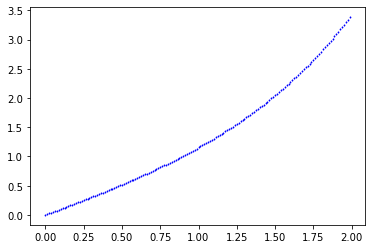

In [22]:
#dt=0.1/(2^4)
x0=0
T=2
N4=160
x,y5=Improved_Euler2(x0,N4,T)
plt.plot(x,y5,'db',markersize=1,label="dt=0.1")
print(y5[-1])

The improved Euler method results went stable around 3.3814 after 5 trials of halving $\Delta{t}$. \
The first trial that reaches 4 decimal places accuracy is therefore the 4th trial, when $\Delta{t}=\frac{0.1}{2^3}$,  $x(2)\approx3.3814$.

### solution (c)


Runge-Kutta Method
----------

3.0948282991710263


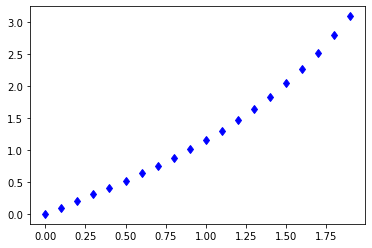

In [24]:
x0=0

#dt=0.1
T=2
N1=20
x,y1=RK4_2(x0,N1,T)
plt.plot(x,y1,'db',markersize=6,label="dt=0.1")
print(y1[-1])

3.2556515535678967


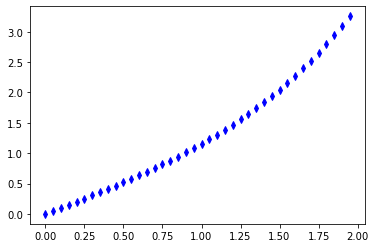

In [25]:
#dt=0.1/2
x0=0
T=2
N1=40
x,y2_RK=RK4_2(x0,N1,T)
plt.plot(x,y2_RK,'db',markersize=5,label="dt=0.1")
print(y2_RK[-1])

3.3390055967033554


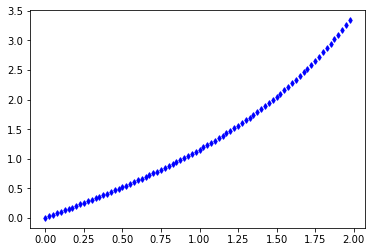

In [26]:
#dt=0.1/(2^2)
x0=0
T=2
N2=80
x,y3=RK4_2(x0,N2,T)
plt.plot(x,y3,'db',markersize=4,label="dt=0.1")
print(y3[-1])

3.381442008347538


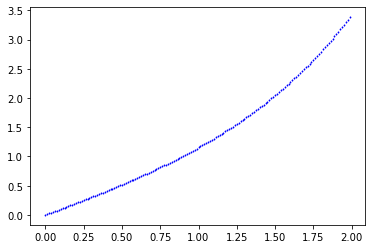

In [27]:
#dt=0.1/(2^3)
x0=0
T=2
N3=160
x,y4=RK4_2(x0,N3,T)
plt.plot(x,y4,'db',markersize=1,label="dt=0.1")
print(y4[-1])

3.381442008347538


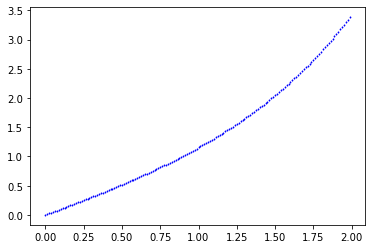

In [28]:
#dt=0.1/(2^4)
x0=0
T=2
N4=160
x,y5=RK4_2(x0,N4,T)
plt.plot(x,y5,'db',markersize=1,label="dt=0.1")
print(y5[-1])

The Runge-Kutta method results went stable around 3.3814 after 5 trials of halving $\Delta{t}$. \
The first trial that reaches 4 decimal places accuracy is therefore the 4th trial, when $\Delta{t}=\frac{0.1}{2^3}$,  $x(2)\approx3.3814$.

### solution (d)


Text(0.5, 1.0, 'x(t) by three methods when $\\Delta{t}=0.05$')

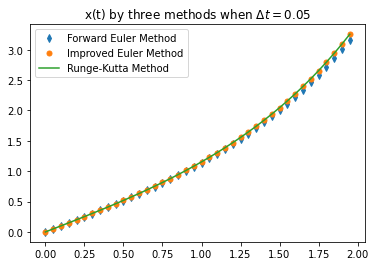

In [32]:
x=np.arange(40)*0.05
plt.plot(x,y2_FE,'d',markersize=5,label="Forward Euler Method")
plt.plot(x,y2_IE,'o',markersize=5,label="Improved Euler Method")
plt.plot(x,y2_RK,'-',markersize=5,label="Runge-Kutta Method")

plt.legend(loc='best')
plt.title('x(t) by three methods when $\Delta{t}=0.05$')

# Problem 3

Consider the ODE
\begin{equation}
\frac{dx}{dt} -t^2 x=-2t^2e^{-t^3} \qquad\hbox{with}\qquad x(0)=x_0
\end{equation}
where $x_0$ is an arbitrary constant.


(a) Find an analytical solution to the ODE. Your solution should involve $x_0$.

(b) Plot your analytical solutions for various choices of $x_0$, e.g. $x_0=3/8, 1/2, 5/8$ for $0\le x\le 2$; it is best to plot all of the curves on the same graph. For which value of $x_0$, call it $x_0^*$, do you expect a monotonic decay to $u\rightarrow 0$ for large $t$?
For  $x_0=x_0^*$, $x_0=x_0^*+0.01$ and $x_0=x_0^*-0.01$, plot solution curves for $0\le t\le 3$  (again, plot these curves on the same graph).

(c) Use the fourth order Runge-Kutta method (with $N=100$) to numerically solve the ODE for $x_0=1/2$. Compare the numerical solution to your analytical solution by plotting both for $0\le t< 4$. Explain why the numerical solution appears to work well at the start, but eventually does not work well. What happens as you decrease the time step (i.e., increase $N$)?


### solution (a)


Original ODE: $\frac{dx}{dt}-t^2x=-2t^2e^{-t^3}$\
Recognizing that this ODE is a first-order non-homogeneous linear ODE,\
we could find the Intergrating Factor$=e^{\int{a(t)dt}}$
$=e^{\int{-t^2dt}}=e^{-t^3/3}$\
Multiplying the intergrating factor to both sides of the ODE, we get:\
\
$\int{(e^{-t^3/3}x)'}=\int{-2t^2e^{-t^3}*e^{-t^3/3}}$\
\
$e^{-t^3/3}x=\int{-2t^2e^{-t^3}*e^{-t^3/3}}$\
\
Let $u=e^{-t^3/3}$, we have $du=e^{-t^3/3}(-t^2)$.
Substituting u, du into the equation, we have:\
\
$ux=\int{2u^3du}$\
$ux=\frac{1}{2}u^4+c$\
$e^{-t^3/3}x=\frac{1}{2}e^{-\frac{4}{3}t^3}+c$\
\
Since $x(0)=x_{0}$\
\
$x_{0}=\frac{1}{2}+c$\
$c=x_{0}-\frac{1}{2}$\
$e^{-t^3/3}x=\frac{1}{2}e^{-\frac{4}{3}t^3}+x_{0}-\frac{1}{2}$\
$x=\frac{1}{2}e^{-t^3}+(x_{0}-\frac{1}{2})e^{t^3/3}$



### solution (b)


In [33]:
def x_analytic(t,x0):
    return 1/2*exp(-t**3)+(x0-1/2)*exp(t**3/3)


Text(0.5, 1.0, 'x(t) with initial conditions $x_{0}=3/8$,$x_{0}=1/2$, and $x_{0}=5/8$')

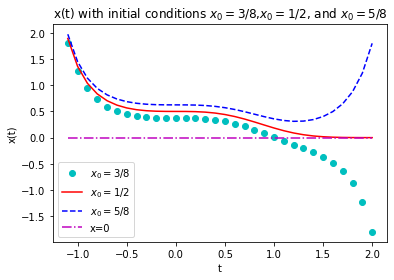

In [34]:
t=np.arange(-1.1,2.1,0.1)

x_3=np.zeros(32)
for i in range(32):
    x_3[i]=x_analytic(t[i],3/8)    

x_4=np.zeros(32)
for i in range(32):
    x_4[i]=x_analytic(t[i],4/8)    
    
x_5=np.zeros(32)
for i in range(32):
    x_5[i]=x_analytic(t[i],5/8)   

plt.plot(t,x_3,'oc',markersize=6,label='$x_{0}=3/8$')
plt.plot(t,x_4,'-r',markersize=8,label='$x_{0}=1/2$')
plt.plot(t,x_5,'--b',markersize=8,label='$x_{0}=5/8$')
plt.plot(t,np.zeros(32),'-.m',markersize=8,label='x=0')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(loc='best')
plt.title('x(t) with initial conditions $x_{0}=3/8$,$x_{0}=1/2$, and $x_{0}=5/8$' )

From the graph above, for $x_{0}^{\ast}=1/2$, I expect it will have a monotonic decay to $x\rightarrow0$ for large t.

Text(0.5, 1.0, 'x(t) with initial conditions $x_{0}=0.49$,$x_{0}=0.5$, and $x_{0}=0.51$')

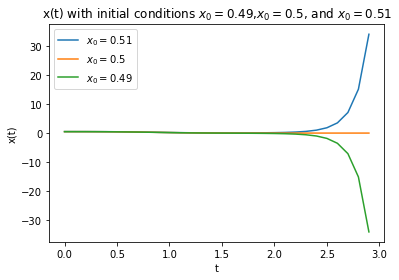

In [35]:
t=np.arange(0,3,0.1)
x_4plus=np.zeros(30)
for i in range(30):
    x_4plus[i]=x_analytic(t[i],4/8+0.01)    
    
x_4original=np.zeros(30)
for i in range(30):
    x_4original[i]=x_analytic(t[i],4/8)    
x_4minus=np.zeros(30)
for i in range(30):
    x_4minus[i]=x_analytic(t[i],4/8-0.01)    

plt.plot(t,x_4plus,markersize=10,label='$x_{0}=0.51$')
plt.plot(t,x_4original,markersize=10,label='$x_{0}=0.5$')
plt.plot(t,x_4minus,markersize=10,label='$x_{0}=0.49$')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(loc='best')
plt.title('x(t) with initial conditions $x_{0}=0.49$,$x_{0}=0.5$, and $x_{0}=0.51$' )

### solution (c)


In [36]:
#ODE 3
def f3(t,x):
    return t**2*x-2*t**2*exp(-t**3)
    

#define the runge-kutta method for x3
def RK4_3(x0,N,T):
    dt=T/N
    t=np.arange(N)*dt
    x=np.zeros(N)
    x[0]=x0
   
    for i in range(N-1):
        k1=f3(t[i],x[i])
        k2=f3(t[i]+dt/2,x[i]+dt/2*k1)
        k3=f3(t[i]+dt/2,x[i]+dt/2*k2)
        k4=f3(t[i]+dt,x[i]+dt*k3)
        x[i+1]=x[i]+dt/6*(k1+2*k2+2*k3+k4)
    return t,x



Text(0.5, 1.0, 'x(t) by numerical and analytical methods with $x_{0}=1/2$')

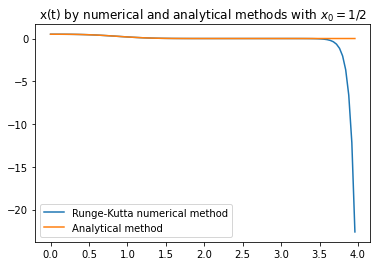

In [37]:
x0=1/2
T=4
N=100
t,x=RK4_3(x0,N,T)
plt.plot(t,x,markersize=10,label="Runge-Kutta numerical method")
t_analytical=np.arange(0,4,0.04)
x_analytical=np.zeros(100)
for i in range(100):
    x_analytical[i]=x_analytic(t[i],4/8)    
plt.plot(t_analytical,x_analytical,markersize=10,label="Analytical method")
plt.legend(loc='best')
plt.title("x(t) by numerical and analytical methods with $x_{0}=1/2$")

For the numerical solution, \
since $\frac{dx}{dt}-t^2x=-2t^2e^{-t^3}$,\
$\frac{dx}{dt}=t^2x-2t^2e^{-t^3}$,\
as $t\rightarrow4$, $\frac{dx}{dt}\rightarrow 16x-32e^{-4^3}$\
since $32e^{-4^3}$ is neglegibly small, we approximate it to be 0.\
Thus，$\frac{dx}{dt}\approx 16x$.\
Therefore as long as we approximate x to be a bit below 0, x will decrease exponentially to negative infinity.
To conclude, the 'lag' of numerical method may cause the solution to deviate from the actual solution.\
**To mediate that 'lag effect', we try decreasing the time step to N=1000.**

Text(0.5, 1.0, 'x(t) by numerical and analytical methods with $x_{0}=1/2$')

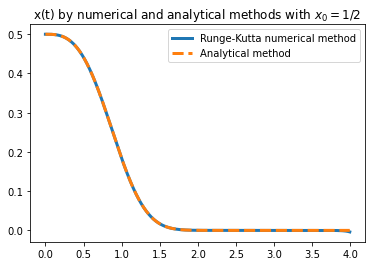

In [38]:
x0=1/2
T=4
N=1000
t,x=RK4_3(x0,N,T)
plt.plot(t,x,linewidth=3,label="Runge-Kutta numerical method")
t_analytical=np.arange(0,4,0.004)
x_analytical=np.zeros(1000)
for i in range(1000):
    x_analytical[i]=x_analytic(t[i],4/8)    
plt.plot(t_analytical,x_analytical,'--',linewidth=3,label="Analytical method")
plt.legend(loc='best')
plt.title("x(t) by numerical and analytical methods with $x_{0}=1/2$")

As we expected, the error of numerical method decreased and worked better when we decreased the time step.\
As we take smaller steps, the projection of each slope gets more "up to date", thus making the solution more accurate.